## **TP2: Métodos** 

In [2]:
import numpy as np
import matplotlib as plt
import numpy.linalg as lng
from scipy.linalg import lu
from scipy import linalg
import networkx as nx
from scipy.stats.stats import pearsonr
import metnum as mt

Leer grafos

In [3]:
def leer_grafo(path):
    file = open(path,'r')
    n = int(file.readline())
    m = int(file.readline())
    M = np.zeros((n, n))
    i = 0
    with open(path,'r') as file:
    # reading each line    
        for line in file:
            if(i>1):
                a = int(line.split()[0])
                b = int(line.split()[1])
                M[a-1][b-1] = 1
            i+=1
    return M

In [4]:
def leer_karateclub(path = "../datasets/karateclub_matriz.txt"):
  M = np.zeros(34*34).reshape(34, 34)
  with open(path,'r') as file:
    # reading each line 
    i = 0
    for line in file:
      line = line.split()
      for j in range(0, len(line)):

        M[i][j] = line[j]
      i+=1
  return M

In [5]:
def leer_labels_karate(path = "../datasets/karateclub_labels.txt"):
    file = open(path,'r')
    labels = np.zeros(34)
    i = 0
    with open(path,'r') as file:
    # reading each line    
        for line in file:
            labels[i] = line
            i+=1
    return labels

In [6]:
M = leer_karateclub()
import sys 
np.set_printoptions(threshold=sys.maxsize)
np.sum(M)


156.0

In [7]:
def leer_facebook(path = "../datasets/ego-facebook.feat"):
  maxInd = 0
  m = 0
  with open(path,'r') as file:
    # reading each line 
    for line in file:
      line = line.split()
      m+=1
      for j in range(0, len(line)):
        maxInd = max(maxInd, int(line[j]))
  return [maxInd, m]

In [8]:
maxInd,m = leer_facebook()
m

28048

Leer karate club con NetworkX

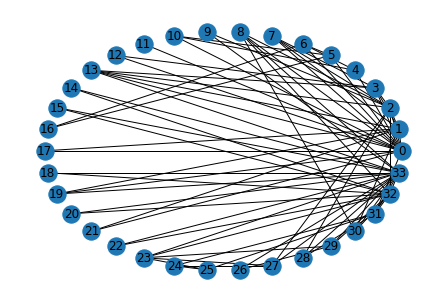

In [9]:
karate = nx.karate_club_graph()
nx.draw_circular(karate, with_labels = True)

# Centralidad del vector 

In [10]:
A = leer_karateclub()
A_labels = leer_labels_karate()

In [11]:
eigval, eigvect = linalg.eig(A)

L = np.zeros(34*34).reshape(34, 34)
np.fill_diagonal(L, np.sum(A, axis = 1))
L = L-A

In [26]:
L_eigval, L_eigvect = mt.deflation(L, 34, 10000, 1e-10)
print(L_eigval)
#L_eigval, L_eigvect = np.linalg.eig(L)
#sort 
sort_labels_eigval = np.argsort(L_eigval)
L_eigval = L_eigval[sort_labels_eigval]
L_eigvect = L_eigvect[::, sort_labels_eigval]
print(L_eigval)

[ 1.81366959e+01  1.70551712e+01  1.33061223e+01  1.09210675e+01
  9.77724097e+00  6.99619702e+00  6.51554460e+00  6.33159226e+00
  5.61803398e+00  5.37859510e+00  4.58079263e+00  4.48000769e+00
  4.27587684e+00  3.47218738e+00  3.38196564e+00  3.37615448e+00
  3.24206749e+00  3.01396297e+00  2.74915717e+00  2.48709174e+00
  1.99999998e+00  1.99999998e+00  1.99999998e+00  1.99999998e+00
  1.99999998e+00  1.95505053e+00  1.82605521e+00  1.76189863e+00
  1.59928308e+00  1.25940411e+00  1.12501072e+00  9.09247665e-01
  4.68525227e-01 -3.25191830e-09]
[-3.25191830e-09  4.68525227e-01  9.09247665e-01  1.12501072e+00
  1.25940411e+00  1.59928308e+00  1.76189863e+00  1.82605521e+00
  1.95505053e+00  1.99999998e+00  1.99999998e+00  1.99999998e+00
  1.99999998e+00  1.99999998e+00  2.48709174e+00  2.74915717e+00
  3.01396297e+00  3.24206749e+00  3.37615448e+00  3.38196564e+00
  3.47218738e+00  4.27587684e+00  4.48000769e+00  4.58079263e+00
  5.37859510e+00  5.61803398e+00  6.33159226e+00  6.5155

In [28]:
#print(pearsonr(A_labels, L_eigvect))

''' MATRIZ DE CORRELACION CON CORRCOEF
    a   b   c   d   .   .   .
a |a.a|a.b|a.c|a.d|....
b |b.a|b.b|b.c|b.d|....
c |c.a|c.b|c.c|c.d|....
d |d.a|d.b|d.c|d.d|....
. |...
. |...
. |...
'''

#A_labels = np.atleast_2d(A_labels)

#label con eigvect 
#labels_eig = L_eigvect >= 0
#labels_eig = labels_eig.astype(float)

A_labels = leer_labels_karate()
#print(A_labels.shape)
#print(labels_eig.shape)

C = np.hstack([L_eigvect, A_labels.reshape(34,1)])
#print(labels_eig)
#print(A_labels.reshape(34,1))

#correlation matrix 
C = abs(np.corrcoef(C.T))

corr = C[:, 34]
corr[34]=0
print(corr)


[4.56896091e-02 8.14720293e-01 2.65951016e-01 3.33292366e-01
 4.46468645e-04 5.57556319e-02 2.71677736e-02 6.87699830e-02
 1.11865912e-02 1.03173805e-05 7.87926580e-06 3.31794798e-06
 1.03141598e-05 2.08034903e-06 1.17402711e-01 1.61346031e-01
 9.56063601e-03 8.67031644e-02 6.51275089e-02 5.34998048e-04
 3.03523713e-04 1.07905734e-02 4.49214728e-02 7.98739932e-02
 2.44850113e-01 7.81034269e-05 1.41377613e-02 7.91773937e-02
 1.04474248e-02 8.50853206e-02 5.82783031e-02 7.84100419e-02
 1.14499878e-02 4.56897750e-02 0.00000000e+00]


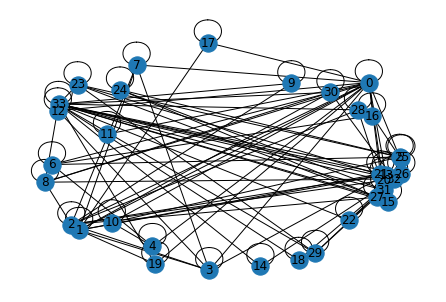

In [29]:
L_g = nx.from_numpy_array(L)
nx.draw_spring(L_g,  with_labels = True)

In [30]:
centrality = nx.eigenvector_centrality(L_g)

sorted((v, f"{c:0.2f}") for v, c in centrality.items())

[(0, '0.36'),
 (1, '0.27'),
 (2, '0.32'),
 (3, '0.21'),
 (4, '0.08'),
 (5, '0.08'),
 (6, '0.08'),
 (7, '0.17'),
 (8, '0.23'),
 (9, '0.10'),
 (10, '0.08'),
 (11, '0.05'),
 (12, '0.08'),
 (13, '0.23'),
 (14, '0.10'),
 (15, '0.10'),
 (16, '0.02'),
 (17, '0.09'),
 (18, '0.10'),
 (19, '0.15'),
 (20, '0.10'),
 (21, '0.09'),
 (22, '0.10'),
 (23, '0.15'),
 (24, '0.06'),
 (25, '0.06'),
 (26, '0.08'),
 (27, '0.13'),
 (28, '0.13'),
 (29, '0.13'),
 (30, '0.17'),
 (31, '0.19'),
 (32, '0.31'),
 (33, '0.37')]

# FACEBOOK

In [31]:
F = leer_facebook()